In [1]:
import falcon
sk = falcon.SecretKey(512)
pk = falcon.PublicKey(sk) 
print(type(sk))

<class 'falcon.SecretKey'>


In [15]:
sig = sk.sign(b"Hello")
print(pk.verify(b"Hello", sig))

True


In [16]:
print(pk.verify(b"Hel1o", sig))

Squared norm of signature is too large: 6629002522
False


In [27]:
sk_ = falcon.SecretKey(512)
pk_ = falcon.PublicKey(sk_)

In [28]:
print(pk_.verify(b"Hello", sig))

Squared norm of signature is too large: 6491733890
False


In [66]:
import time

In [8]:
mensajes=[b"Sol y mar.",b"Cielo azul y sol.",b"Amigos disfrutan el dia juntos.",b"La musica suena en la noche, creando recuerdos inolvidables.",b"En la vasta pradera, los caballos galopan libremente mientras el viento sopla suavemente.",b"En el tranquilo pueblo costero, las olas rompen suavemente en la playa dorada, creando un paisaje de serenidad.",b"Bajo el cielo estrellado, un poeta inspirado escribe versos que capturan la belleza y la melancolia de la noche, mientras que los corazones sensibles encuentran consuelo en sus palabras.",b"A traves de los siglos, la humanidad ha forjado su camino, enfrentando desafios y celebrando triunfos, tejiendo historias que quedan grabadas en el tejido del tiempo, como un testimonio de nuestra existencia en este vasto universo."]

In [14]:
seguridad=[64,128,256,512,1024]

In [40]:
llaves=[]
firmas=[]
verificacion=[]
for i in range(len(mensajes)):
    print("***********************************************************")
    print("\t\t\t Para el mensaje número ",i)
    print(mensajes[1])
    llave_tiempo       =[]
    firma_tiempo       =[]
    verificacion_tiempo=[]
    for j in range(len(seguridad)):
        print("Con el nivel de seguridad ",seguridad[j])
        inicio=time.time()
        sk = falcon.SecretKey(seguridad[j])
        pk = falcon.PublicKey(sk) 
        fin=time.time()
        llave_tiempo.append(-inicio+fin)
        print("El tiempo que tomó la generación de las llaves: ",-inicio+fin)
        
        inicio=time.time()
        sig = sk.sign(mensajes[i])
        fin=time.time()
        firma_tiempo.append(-inicio+fin)
        print("El tiempo que tomó firmar el mensaje: ",-inicio+fin)
        
        inicio=time.time()
        veri=pk.verify(mensajes[i], sig)
        fin=time.time()
        verificacion_tiempo.append(-inicio+fin)
        print("La verificación fue: ",veri)
        print("El tiempo de la verificación fue de: ",-inicio+fin)
        
    llaves.append(llave_tiempo)
    firmas.append(firma_tiempo)
    verificacion.append(verificacion_tiempo)

***********************************************************
			 Para el mensaje número  0
b'Cielo azul y sol.'
Con el nivel de seguridad  64
El tiempo que tomó la generación de las llaves:  0.3353703022003174
El tiempo que tomó firmar el mensaje:  0.0033926963806152344
La verificación fue:  True
El tiempo de la verificación fue de:  0.0004985332489013672
Con el nivel de seguridad  128
El tiempo que tomó la generación de las llaves:  0.79166579246521
El tiempo que tomó firmar el mensaje:  0.006319284439086914
La verificación fue:  True
El tiempo de la verificación fue de:  0.001043081283569336
Con el nivel de seguridad  256
El tiempo que tomó la generación de las llaves:  2.163188934326172
El tiempo que tomó firmar el mensaje:  0.012054681777954102
La verificación fue:  True
El tiempo de la verificación fue de:  0.002165555953979492
Con el nivel de seguridad  512
El tiempo que tomó la generación de las llaves:  2.280290365219116
El tiempo que tomó firmar el mensaje:  0.02462959289550781

El tiempo que tomó la generación de las llaves:  0.6862814426422119
El tiempo que tomó firmar el mensaje:  0.005678892135620117
La verificación fue:  True
El tiempo de la verificación fue de:  0.0010285377502441406
Con el nivel de seguridad  256
El tiempo que tomó la generación de las llaves:  1.2376749515533447
El tiempo que tomó firmar el mensaje:  0.012358665466308594
La verificación fue:  True
El tiempo de la verificación fue de:  0.002115011215209961
Con el nivel de seguridad  512
El tiempo que tomó la generación de las llaves:  3.469109535217285
El tiempo que tomó firmar el mensaje:  0.025054931640625
La verificación fue:  True
El tiempo de la verificación fue de:  0.004460811614990234
Con el nivel de seguridad  1024
El tiempo que tomó la generación de las llaves:  12.7000572681427
El tiempo que tomó firmar el mensaje:  0.05028796195983887
La verificación fue:  True
El tiempo de la verificación fue de:  0.009491682052612305
********************************************************

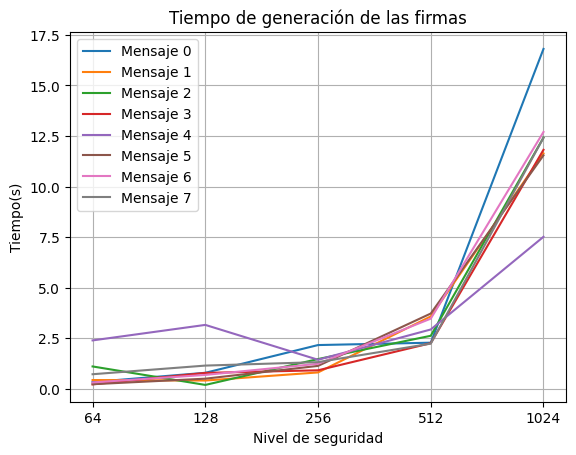

In [65]:
import matplotlib.pyplot as plt
for i in range(len(llaves)):
    plt.plot(llaves[i],label=str("Mensaje ")+str(i))
plt.grid()
plt.xticks(range(0,5,1),seguridad)
plt.xlabel("Nivel de seguridad")
plt.ylabel("Tiempo(s)")
plt.title("Tiempo de generación de las firmas")
plt.legend()
plt.show()

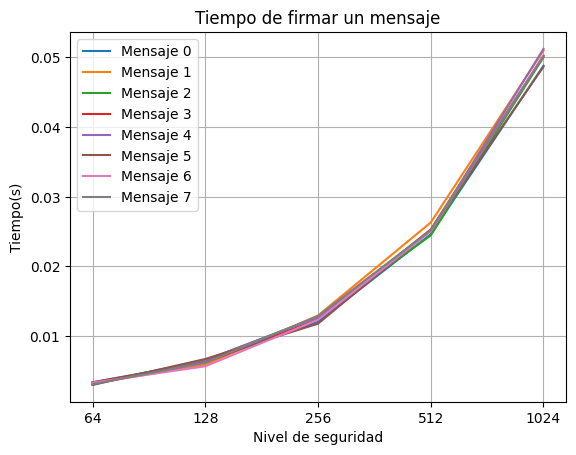

In [64]:
import matplotlib.pyplot as plt
for i in range(len(firmas)):
    plt.plot(firmas[i],label=str("Mensaje ")+str(i))
plt.grid()
plt.xticks(range(0,5,1),seguridad)
plt.xlabel("Nivel de seguridad")
plt.ylabel("Tiempo(s)")
plt.title("Tiempo de firmar un mensaje")
plt.legend()
plt.show()

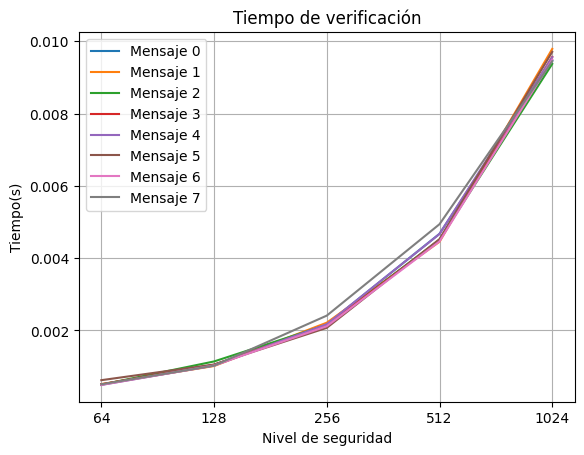

In [63]:
import matplotlib.pyplot as plt
for i in range(len(verificacion)):
    plt.plot(verificacion[i],label=str("Mensaje ")+str(i))
plt.grid()
plt.xticks(range(0,5,1),seguridad)
plt.xlabel("Nivel de seguridad")
plt.ylabel("Tiempo(s)")
plt.title("Tiempo de verificación")
plt.legend()
plt.show()